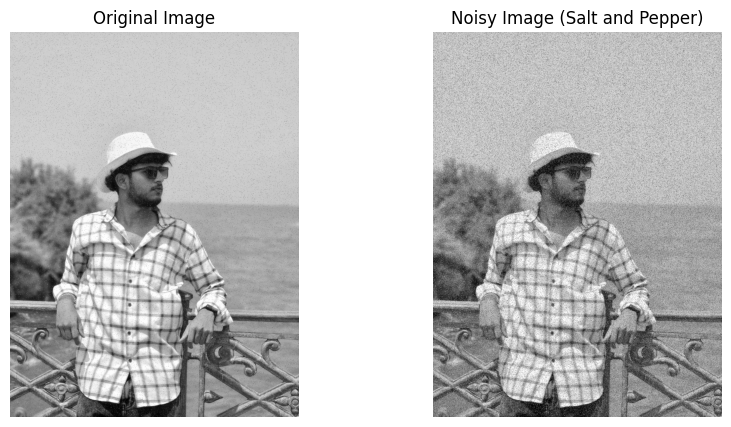

In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a color image (make sure the image is in the same directory or provide the full path)
image = cv2.imread('original image.jpg')

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found!")
else:
    # Convert the image to RGB (OpenCV loads images in BGR format by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create a copy of the image to add noise
    noisy_image = image_rgb.copy()
    total_pixels = image_rgb.size // 3  # Dividing by 3 for the 3 color channels (R, G, B)
    
    # Increase salt and pepper noise levels
    salt_prob = 0.07  # Increase this to add more salt noise (5% of total pixels)
    pepper_prob = 0.07 # Increase this to add more pepper noise (5% of total pixels)
    
    # Salt noise (white pixels)
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image_rgb.shape]
    noisy_image[salt_coords[0], salt_coords[1], :] = 255  # Set white pixels for all channels
    
    # Pepper noise (black pixels)
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image_rgb.shape]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0  # Set black pixels for all channels
    
    # Display the original and noisy image using matplotlib
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    # Noisy image
    plt.subplot(1, 2, 2)
    plt.imshow(noisy_image)
    plt.title("Noisy Image (Salt and Pepper)")
    plt.axis('off')

    # Show the images
    plt.show()
